# CLEAN DATA

##  ❊ Overview

<img src="https://upload.wikimedia.org/wikipedia/vi/a/ab/Titanic_3D_poster_Vietnam.jpg" width="300">

**Data dictionary**
 
| Variable | Definition | Key |
|:--:|:--:|:--:|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class, a proxy for socio-economic status (SES) | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Gender | |
| Age | Age in years | |
| sibsp | # of siblings(brother,sister)/spouses(husband, wife) aboard the Titanic |
| parch | # of parents/children aboard the Titanic. Some children travelled only with a nanny, therefore parch=0 for them |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C=Cherbourg, Q=Queenstown, S=Southampton |

In [2]:
import pandas as pd

In [3]:
# df = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/titanic.csv')
df = pd.read_csv('data\\titanic.csv', dtype={'Fare': 'str'})

In [76]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3,B35,C
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5,NaN,S


In [77]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


##  1. Remove unwanted data

Not all the provided data is neccessary for the analysis, or in other words, able to answer the defined questions. It can be either that we only need certain number of columns certain number of rows. For example, sale data from 2009 to 2012 only, not the entire time. 


One of the early stage of data cleaning is to filter out those irrelavant data.  

In [78]:
# You might want to have a copy of the original data.
df2 = df.copy()

In [79]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


The implementation on code is easy with `drop`. 

In [80]:
df2.drop(columns=['Pclass'])

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30,B42,S
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30,C148,C


In [81]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [82]:
# Drop columns 
df2.drop(columns=['Cabin', 'Embarked'], inplace=True) # Cach 1
# df2 = df2.drop(columns=['Cabin', 'Embarked']) #Cach 2

# Drop rows
df2.drop(index=[0, 2, 3], inplace=True)

In [83]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30


Change the name of specific column ▸ {old name: new name}

In [84]:
df2 = df2.rename(columns={'Name':'PassengerName', 'SibSp':'NumberSibling'})
df2

,PassengerId,Survived,Pclass,PassengerName,Sex,Age,NumberSibling,Parch,Ticket,Fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30


Change all the columns' names. Names must be in the same order with the columns. 

In [85]:
df2.columns = ['A', 'B', 'C', 'D', 'E', 'F', '7', '8', '9', '10']

In [86]:
df2.head()

,A,B,C,D,E,F,7,8,9,10
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075


##  2. Check and change datatype

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [88]:
# Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [89]:
# Using astype to change the datatype
df['Fare'] = df['Fare'].astype('float')

In [90]:
# Change passengerId to string:
df['PassengerId'] = df['PassengerId'].astype('str')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


## 3. Working with Missing Values

**▸ Sources of Missing Values**

Before we dive into code, it’s important to understand the sources of missing data. Here’s some typical reasons why data is missing:
- User forgot to fill in a field.
- Data was lost while transferring manually from a legacy database.
- There was a programming error.
- Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

As you can see, some of these sources are just simple random mistakes. Other times, there can be a deeper reason why data is missing.

**▸ Methods to work with Missing Values**

* Delete the case with missing observations. This is OK if this only causes the loss of a relatively small
number of cases. This is the simplest solution.
* Fill-in the missing value with mean, mode, median or other constant value.
* Use the rest of the data to predict the missing values by regression, KNN, ...

In Pandas, there are several useful methods for detecting, removing, and replacing null values:

* `isna()` or `isnull()`: Generate a boolean mask indicating missing values
* `notna()` or `notnull()`: Opposite of isnull()
* `dropna()`: Return a filtered version of the data
* `fillna()`: Return a copy of the data with missing values filled or imputed

**▸ Detecting null value**: Pandas data structures have two useful methods for detecting null data: `isnull()` and `notnull()`. Either one will return a Boolean mask over the data. For example:

In [92]:
data = pd.DataFrame({'Column_1': [1, None, 2],
                     'Column_2': [2, 3, 5],
                     'Column_3': [None, 4, 6]})
data

,Column_1,Column_2,Column_3
0,1.0,2,NaN
1,NaN,3,4.0
2,2.0,5,6.0


In [93]:
data.isna()

,Column_1,Column_2,Column_3
0,False,False,True
1,True,False,False
2,False,False,False


In [94]:
# True = 1, False = 0
True + False + True

2

In [95]:
# Python: True = 1, False = 0
data.isna().sum()

Column_1    1
Column_2    0
Column_3    1
dtype: int64

In [96]:
# Show các dòng có nan value? 
data[data['Column_1'].isna()]

,Column_1,Column_2,Column_3
1,NaN,3,4.0


**▸ Dropping null value**: In addition to the masking used before, there are convenient methods, `dropna()` (which removes NA values) and `fillna()` (which fills in NA values). The result is straightforward but be careful that you have to call `inplace=True` if you want to commit your change to the dataframe.

In [97]:
data

,Column_1,Column_2,Column_3
0,1.0,2,NaN
1,NaN,3,4.0
2,2.0,5,6.0


In [98]:
# Drop the rows
data.dropna(axis=0)

,Column_1,Column_2,Column_3
2,2.0,5,6.0


In [99]:
data

,Column_1,Column_2,Column_3
0,1.0,2,NaN
1,NaN,3,4.0
2,2.0,5,6.0


We cannot drop single values from a DataFrame; we can only drop full rows or full columns. Depending on the application, you might want one or the other, so `dropna()` gives a number of options for a DataFrame.

By default, `dropna()` will drop all rows in which any null value is present.

In [100]:
# Drop the columns
data.dropna(axis=1)

,Column_2
0,2
1,3
2,5


In [101]:
data

,Column_1,Column_2,Column_3
0,1.0,2,NaN
1,NaN,3,4.0
2,2.0,5,6.0


**▸ Filling null values**: Sometimes rather than dropping NA values, you'd rather replace them with a valid value. This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values. You could do this in-place using the `isnull()` method as a mask, but because it is such a common operation Pandas provides the `fillna()` method, which returns a copy of the array with the null values replaced.

In [102]:
data

,Column_1,Column_2,Column_3
0,1.0,2,NaN
1,NaN,3,4.0
2,2.0,5,6.0


In [103]:
# Fill all missing values with the constant 0
data['Column_1'].fillna(0)

0    1.0
1    0.0
2    2.0
Name: Column_1, dtype: float64

In [104]:
data

,Column_1,Column_2,Column_3
0,1.0,2,NaN
1,NaN,3,4.0
2,2.0,5,6.0


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column_1  2 non-null      float64
 1   Column_2  3 non-null      int64  
 2   Column_3  2 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 200.0 bytes


**Example on the dataset**

In [106]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.00,NaN,S
459,460,0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.75,NaN,Q
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.50,NaN,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.00,B96 B98,S


In [107]:
# Check for null value
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
df['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [109]:
# Display the rows where Age is null
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [110]:
# Tỷ lệ số dòng Age Nan với dataset ban đầu
df[df['Age'].isna()].shape[0] / df.shape[0]

0.19865319865319866

In [111]:
# Drop the data?
# df['Age'].dropna()

In [112]:
df['Age'].mean()

29.69911764705882

In [113]:
# Fill with the average Age
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [114]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [115]:
# Fill null values with "Unknown"
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [116]:
# Check for null value again
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [117]:
# Check Embarked NA:
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [119]:
2/df.shape[0]*100

0.22446689113355783

In [123]:
# We can drop them:
df = df[~df['Embarked'].isna()]

In [124]:
# Check Na again:
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

##  4. Handling duplicated data

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [125]:
# Check for the whole duplicated rows
df.duplicated().sum()

0

In [127]:
# Check for duplication in "Name" only
df['Pclass'].duplicated().sum()

886

In [128]:
# Create a temporary table for study
temp = pd.concat([df, df.head()], axis=0)
temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [129]:
temp.duplicated().sum()

5

In [133]:
# Check Field duplicated:
temp.PassengerId.duplicated().sum()

5

In [130]:
# Display the duplication
temp[temp.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [131]:
# Drop duplicated:
temp_drop_dup = temp.drop_duplicates('PassengerId', keep='first')
temp_drop_dup

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [132]:
# Check duplicated values again:
temp_drop_dup.duplicated().sum()

0

##  5. Handle mislabeled and corrupted data

To do this task, we need to go to each column and see what are really there. Some useful tool can be used at this scanning process are:

`.describe()`: to return a statistical overview.

`.unique()`, `.nunique()`, `.value_counts()`: review on categorical columns

`.apply()`: To scan through the rows and fix them with predefined function.

`.str.replace()`: string method to replace unwanted value in string columns.

### 👉 Descriptive Statistics, detect and handle outliers

In [135]:
# Compute a descriptive statistics review
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Descriptive statistics** are broken down into **measures of central tendency** and **measures of variability (spread)**.

 <img src='https://i.imgur.com/uKuyHoV.png' width=500>

**❊ MEASURE OF CENTRAL TENDENCY**:

- Mean (Arithmetic Mean): the sum of the values divided by the number of values.
- Median: the middlemost number in a sorted set of data. Be careful: To find the Median, the data should first be sorted in order from least to greatest.
- Mode: the values that appear the  most in a set of data.

<img src="https://miro.medium.com/max/828/0*wHMvuwRa_YF9SFwY.webp" width="600">

In [137]:
print('Fare mean', df['Fare'].mean())
print('Fare median', df['Fare'].median())
print('Fare mode', df['Pclass'].mode())

Fare mean 32.09668087739032
Fare median 14.4542
Fare mode 0    3
Name: Pclass, dtype: int64


In [138]:
df['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

👉 Most of people in titanic just a normal person!

In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**❊ SPREAD & OUTLIER DETECTION**
- Range, Varience, Standard Deviation
- Quantiles, Inter-quantile Range 

One of the measure that describes how spread out the data is is the **Quantile**, which divides data into 4 equal quantiles. 

<img src='https://cdn.scribbr.com/wp-content/uploads/2020/09/iqr_quartiles.png'>

In [ ]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**Interquartiles Range**

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png' width=400>



To identify the outliers, we follow 3 steps:

- ***Step 1***: Identify the Inter-quartiles Range 

    IQR = Q3 - Q1


- ***Step 2***: Calculate the lower whisker and upper whisker

    upper-whisker = Q3 + 1.5*IQR

    lower-whisker = Q1 - 1.5*IQR


- ***Step 3***: Identify the outliers. Data that is below the lower whisker or above the upper whisker will be considered to be outliers.

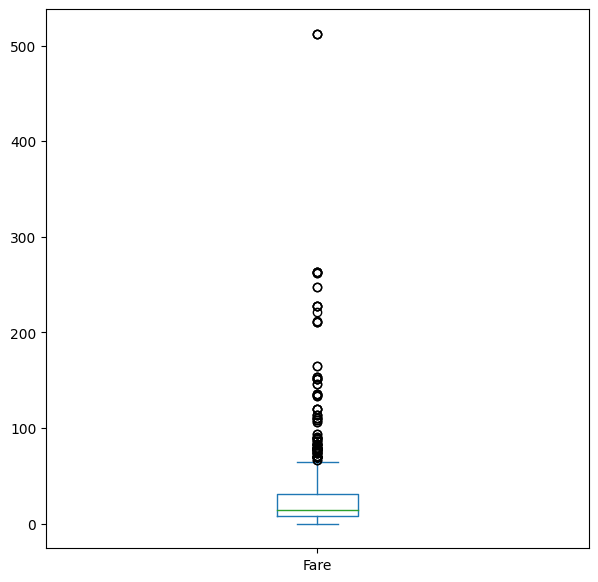

In [145]:
# Visualize with boxplot
df['Fare'].plot(kind='box', figsize=(7, 7));

In [139]:
# Calculate the quantiles -- Tính Q1 và Q3
q1 = df['Fare'].quantile(0.25) # Tính Q1
q3 = df['Fare'].quantile(0.75) # Tính Q3 

# Calculate the interquantile range
iqr = q3 - q1

# Calculate the whisker
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [141]:
q1, q3

(7.8958, 31.0)

In [ ]:
upper

65.6344

In [ ]:
lower

-26.724

🥸 **DISCUSSION: Given this upper and lower values. Which one is the right syntax to filter the data that in between the range of upper and lower?**

A/ ```df[lower < df['Fare'] < upper]```

B/ ```df[lower < df['Fare'] & df['Fare'] < upper]```

C/ ```df[(lower < df['Fare']) & (df['Fare'] < upper)]```

D/ ```df[(df['Fare'] < lower) & (df['Fare'] > upper)]```

In [142]:
# Normal


# Super rich kid


Xem tỉ lệ sống xót của các hành khách siêu giàu. Những hành khách trả siêu nhiều tiền 

Sex
female    0.926471
male      0.304348
Name: Survived, dtype: float64

Các hành khách siêu giàu đến từ những cảng nào

S    60
C    52
Q     2
Name: Embarked, dtype: int64

# SUMMARY:

1. Remove unwanted data:
    
    ```python
        .info() #check general information
        .describe() #statistically overview the column.
        .drop(columns=['A', 'B', 'C'], inplace=True) #drop columns
        .astype('int64') #cast the column to different datatype
        .rename(columns={'Name':'PassengerName', 'SibSp':'NumberSibling'}, inplace=True) #rename columns
         
         # Advanced
         pd.to_datetime(column) #cast the column to datetime datatype
    ```
2. Handling missing values:
    
    ```python
        .isna() # Detect nan values.
        .isnull()
        df['column'].isna().sum() # Count how many NaN are there in column
        df[df['column'].isna()] # display the rows where there is NaN values

        .fillna(0) # Fill NaN with 0
    ```

3. Handling duplication:
    
    ```python
        .duplicated() # Detect duplication
        df['column'].duplicated().sum() # Count how many duplication are there in column
        df[df['column'].duplicated()] # Choose duplicated rows
        df[~df['column'].duplicated()] # Choose non-duplicated rows.
    ```

4. Handling mislabeled and corrupted data:

    - Scan through each column, use `.info()`, `.describe()`, `value_counts()`, `unique()`, `nunique()`, etc to overview the column.
    - Use `.apply()`, `.str.replace()`, etc to edit the error. Or simply drop them.


5. Filter outliers using statistics.
    - Step 1: Calculate the IQR: IQR = Q3 - Q1
    - Step 2: Calculate whisker:

        upper_whisker = Q3 + 1.5*IQR

        lower_whisker = Q1 - 1.5*IQR
    - Step 3: Everything below the lower whisker or above the upper whisker is considered as outliers.
